In [3]:
import matplotlib.pylab as plt
import numpy as np
import scipy.stats as st
import sklearn.linear_model as lm
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# y = mx + b
# m is slope, b is y-intercept
def Error_fun(b, m, points):
    x=points[:,0]
    y=points[:,1]
    N = len(x)
    totalError = (sum(y-(m*x-b))**2)/N
    return totalError 

In [5]:
def stepGradient(b_current, m_current, points, alpha):
    x=points[:,0]
    y=points[:,1]
    N = len(x)
    new_b = b_current - alpha*((2/N)*(sum(-(y-(m_current*x+b_current))))) 
    new_m = m_current - alpha*((2/N)*(sum(-x*(y-(m_current*x +b_current))))) 
    return [new_b, new_m]

In [6]:
def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = stepGradient(b, m, np.array(points), learning_rate)
        #print(Error_fun(b,m,points))
        #print(b,m)
    return [b, m]

100


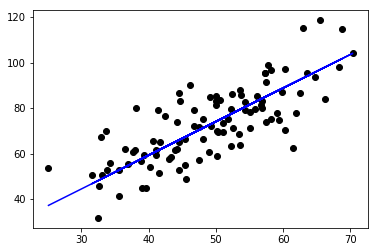

In [7]:
points = np.genfromtxt("data.csv", delimiter=",")
x=points[:,0]
y=points[:,1]
print(len(x))
alpha = 0.00001
initial_b = 0.03 # initial y-intercept guess
initial_m = 1.4 # initial slope guess
num_iterations = 1000

[b, m] = gradient_descent_runner(points, initial_b, initial_m, alpha, num_iterations)
y_fit= m*x +b
plt.scatter(x,y,color='black')
plt.plot(x,y_fit,color='blue')
plt.show()


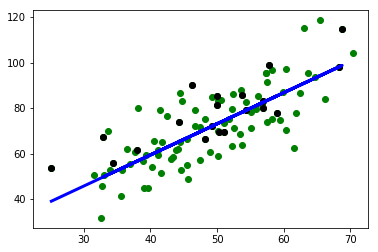

In [10]:
# Load the diabetes dataset
points = np.genfromtxt("data.csv", delimiter=",")
N=len(points[:,0])
data_x=(points[:,0]).reshape(N,1)
data_y=points[:,1]
# Split the data into training/testing sets
data_x_train = data_x[:-20]
data_x_test = data_x[-20:]

# Split the targets into training/testing sets
data_y_train = data_y[:-20]
data_y_test = data_y[-20:]

# Create linear regression object
regr = lm.LinearRegression()

# Train the model using the training sets
regr.fit(data_x_train, data_y_train)
''''
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(diabetes_X_test) - diabetes_y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(diabetes_X_test, diabetes_y_test))
'''
# Plot outputs
plt.scatter(data_x, data_y,  color='green')
plt.scatter(data_x_test, data_y_test,  color='black')
plt.plot(data_x_test, regr.predict(data_x_test), color='blue',linewidth=3)

#plt.xticks(())
#plt.yticks(())

plt.show()
